In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from maad import sound

from os import listdir
from os.path import isfile, join

from utils import plot_listen_examples

plt.rcParams["figure.figsize"] = (19,7)

In [23]:
list(set([10]))

[10]

# Read Labels:

In [24]:
from preprocessing.preprocessing import load_annotations

In [25]:
recordings_folder = 'data/INCT41/raw/recordings/'
annotation_path = 'data/INCT41/raw/annotations/'

In [26]:
df = load_annotations(path_annot=annotation_path)

In [29]:
df.shape

(2082, 6)

In [27]:
df.head()

,fname,label,min_t,min_f,max_t,max_f
0,INCT41_20200126_190000,PHYCUV_F,0.0,NaN,3.0,NaN
1,INCT41_20200126_190000,DENCRU_M,0.0,NaN,19.0,NaN
2,INCT41_20200126_190000,PHYCUV_F,4.0,NaN,6.0,NaN
3,INCT41_20200126_190000,BOALUN_M,5.0,NaN,7.0,NaN
4,INCT41_20200126_190000,BOAALB_M,6.0,NaN,7.0,NaN


In [33]:
df[['site','date']] = df['fname'].str.split('_',1,expand=True)
df['date'] = df['date'].str.split('_').apply(lambda x: x[0]+x[1])
df['date'] = pd.to_datetime(df['date'])

df[['species','quality']] = df['label'].str.split('_',expand=True)
df['label_duration'] = df['max_t'] - df['min_t']

In [34]:
df.head()

,fname,label,min_t,min_f,max_t,max_f,site,date,species,quality,label_duration
0,INCT41_20200126_190000,PHYCUV_F,0.0,NaN,3.0,NaN,INCT41,2020-01-26 19:00:00,PHYCUV,F,3.0
1,INCT41_20200126_190000,DENCRU_M,0.0,NaN,19.0,NaN,INCT41,2020-01-26 19:00:00,DENCRU,M,19.0
2,INCT41_20200126_190000,PHYCUV_F,4.0,NaN,6.0,NaN,INCT41,2020-01-26 19:00:00,PHYCUV,F,2.0
3,INCT41_20200126_190000,BOALUN_M,5.0,NaN,7.0,NaN,INCT41,2020-01-26 19:00:00,BOALUN,M,2.0
4,INCT41_20200126_190000,BOAALB_M,6.0,NaN,7.0,NaN,INCT41,2020-01-26 19:00:00,BOAALB,M,1.0


In [38]:
df['label'].value_counts(normalize=True)*100

BOAALB_F      34.293948
BOALUN_F      31.364073
PHYCUV_F      11.095101
BOAALB_M       9.990394
PHYMAR_F       3.554275
BOALUN_M       2.353506
DENCRU_F       2.017291
PITAZU_F       1.392891
PHYCUV_M       1.296830
DENCRU_M       0.624400
BOALUN_C       0.432277
PHYMAR_M       0.432277
PITAZU_M       0.432277
PHYMAR_C       0.336215
BOAALB_M       0.144092
BOALUN_F       0.096061
BOAALB_F       0.048031
PHYCUV_M       0.048031
PHYCUV_F       0.048031
Name: label, dtype: float64

In [36]:
round(100*df['species'].value_counts(normalize=True),1)

BOAALB    44.5
BOALUN    34.2
PHYCUV    12.5
PHYMAR     4.3
DENCRU     2.6
PITAZU     1.8
Name: species, dtype: float64

In [37]:
df['label'].value_counts()

BOAALB_F      714
BOALUN_F      653
PHYCUV_F      231
BOAALB_M      208
PHYMAR_F       74
BOALUN_M       49
DENCRU_F       42
PITAZU_F       29
PHYCUV_M       27
DENCRU_M       13
BOALUN_C        9
PHYMAR_M        9
PITAZU_M        9
PHYMAR_C        7
BOAALB_M        3
BOALUN_F        2
BOAALB_F        1
PHYCUV_M        1
PHYCUV_F        1
Name: label, dtype: int64

In [14]:
df['label'].shape

(1004,)

In [12]:
df['date'].describe(datetime_is_numeric=True)


count                             1004
mean     2019-12-13 07:11:57.131473920
min                2019-09-30 21:00:00
25%                2019-11-07 20:15:00
50%                2019-12-13 00:30:00
75%                2020-01-20 21:30:00
max                2020-03-31 21:15:00
Name: date, dtype: object

In [14]:
round(100*df['label'].value_counts(normalize=True),1)


BOAFAB    52.6
PHYCUV    37.6
BOABIS     2.8
BOAPRA     2.2
UND        2.1
SCIPER     2.1
SPHSUR     0.5
LEPLAT     0.1
Name: label, dtype: float64

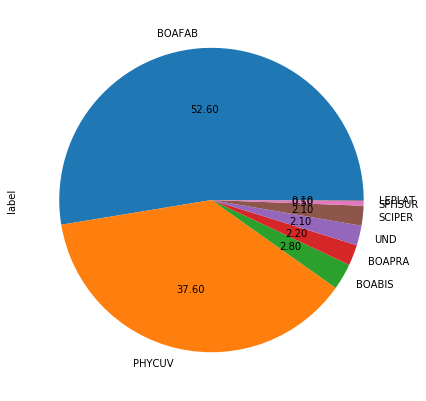

In [15]:
round(100*df['label'].value_counts(normalize=True),1).plot(kind='pie',autopct='%.2f', )


In [16]:
count = dict(round(100*df['label'].value_counts(normalize=True),1))
count.keys()
count.values()

dict_values([52.6, 37.6, 2.8, 2.2, 2.1, 2.1, 0.5, 0.1])

In [17]:
list(count.keys())


['BOAFAB', 'PHYCUV', 'BOABIS', 'BOAPRA', 'UND', 'SCIPER', 'SPHSUR', 'LEPLAT']

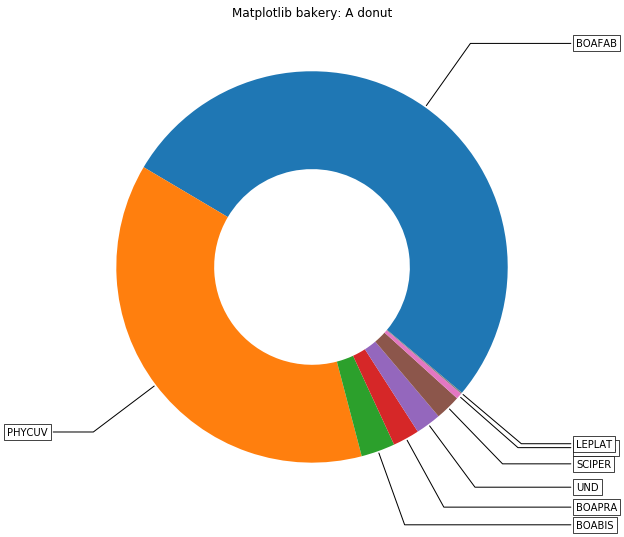

In [20]:
fig, ax = plt.subplots(figsize=(19, 9), subplot_kw=dict(aspect="equal"))

recipe = list(count.keys())


data = list(count.values())

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

In [24]:
# overlap
df_overlaps = df.groupby(['date']).agg({'label':lambda x: len(set(x))})
df_overlaps['label'].value_counts()

1    68
2    60
6     1
4     1
Name: label, dtype: int64

In [25]:
round(100*df['quality'].value_counts(normalize=True),1)


F    62.0
M    37.1
C     0.9
Name: quality, dtype: float64

In [26]:
df.groupby(['label','quality'])['site'].count()


label   quality
BOABIS  C            4
        F            7
        M           17
BOAFAB  C            4
        F          238
        M          286
BOAPRA  F           21
        M            1
LEPLAT  F            1
PHYCUV  F          323
        M           55
SCIPER  F           21
SPHSUR  F            5
UND     C            1
        F            3
        M           12
Name: site, dtype: int64

In [27]:
df.columns


Index(['fname', 'label', 'min_t', 'min_f', 'max_t', 'max_f', 'site', 'date',
       'quality', 'label_duration'],
      dtype='object')

In [28]:
df[['min_t', 'max_t', 'label_duration']].describe()


,min_t,max_t,label_duration
count,1004.000000,1004.000000,1004.000000
mean,25.010956,33.367531,8.356574
std,18.348484,18.805649,15.833642
min,0.000000,1.000000,1.000000
25%,8.000000,17.000000,1.000000
50%,25.000000,33.000000,2.000000
75%,41.000000,51.000000,5.250000
max,59.000000,61.000000,61.000000


In [29]:
total_label_duration = df['label_duration'].sum()  
total_recording_time = df[['date']].drop_duplicates().shape[0]*60
print('Total duration of recordings:', total_recording_time)
print('Total labels duration:', total_label_duration)

print('Percentage of labels:', round(100*total_label_duration/total_recording_time,1))

Total duration of recordings: 7800
Total labels duration: 8390.0
Percentage of labels: 107.6


In [30]:
df.groupby(['label'])['label_duration'].sum()


label
BOABIS      36.0
BOAFAB    5595.0
BOAPRA      30.0
LEPLAT       1.0
PHYCUV    2666.0
SCIPER      28.0
SPHSUR       7.0
UND         27.0
Name: label_duration, dtype: float32

In [31]:
df.groupby(['date', 'label'])['label_duration'].sum()


date                 label 
2019-09-30 21:00:00  BOAFAB    11.0
2019-10-11 21:45:00  BOAFAB    60.0
                     PHYCUV    32.0
2019-10-11 22:30:00  PHYCUV     9.0
2019-10-11 23:30:00  BOAFAB    36.0
                               ... 
2020-03-14 21:15:00  BOAFAB    60.0
2020-03-31 21:15:00  BOABIS     2.0
                     BOAPRA     7.0
                     SPHSUR     2.0
                     UND        3.0
Name: label_duration, Length: 198, dtype: float32

In [32]:
df.groupby(['date', 'quality'])['label_duration'].sum()


date                 quality
2019-09-30 21:00:00  F          11.0
2019-10-11 21:45:00  F          19.0
                     M          73.0
2019-10-11 22:30:00  F           9.0
2019-10-11 23:30:00  F          36.0
                                ... 
2020-03-14 19:15:00  M          60.0
2020-03-14 20:15:00  M          60.0
2020-03-14 21:15:00  M          60.0
2020-03-31 21:15:00  C           1.0
                     F          10.0
Name: label_duration, Length: 201, dtype: float32

In [34]:
df_boafab = df[(df['label']=='BOAFAB')&(df['quality'].isin(['C','M']))]
df_boafab.head()


,fname,label,min_t,min_f,max_t,max_f,site,date,quality,label_duration
10,INCT20955_20191011_214500,BOAFAB,0.0,NaN,60.0,NaN,INCT20955,2019-10-11 21:45:00,M,60.0
48,INCT20955_20191012_033000,BOAFAB,2.0,NaN,3.0,NaN,INCT20955,2019-10-12 03:30:00,M,1.0
49,INCT20955_20191012_033000,BOAFAB,3.0,NaN,5.0,NaN,INCT20955,2019-10-12 03:30:00,M,2.0
50,INCT20955_20191012_033000,BOAFAB,6.0,NaN,8.0,NaN,INCT20955,2019-10-12 03:30:00,M,2.0
51,INCT20955_20191012_033000,BOAFAB,10.0,NaN,11.0,NaN,INCT20955,2019-10-12 03:30:00,M,1.0


In [35]:
df_boafab[['min_t', 'max_t', 'label_duration']].describe()


,min_t,max_t,label_duration
count,290.000000,290.000000,290.000000
mean,23.110344,38.627586,15.517241
std,19.266882,18.735989,22.616589
min,0.000000,1.000000,1.000000
25%,1.250000,23.000000,1.000000
50%,22.000000,40.500000,3.000000
75%,39.750000,60.000000,18.000000
max,59.000000,61.000000,61.000000


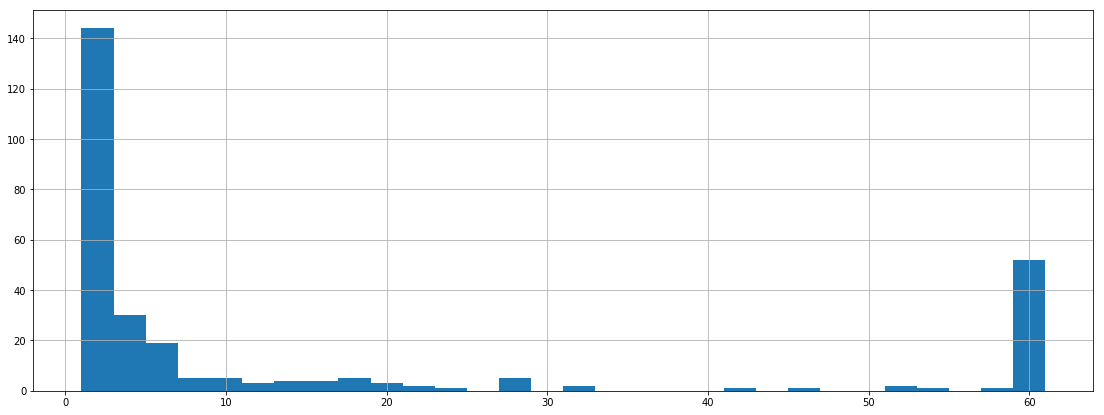

In [36]:
df_boafab['label_duration'].hist(bins=30)


In [37]:
df_boafab['fname'].drop_duplicates().shape


(84,)

# Interpretation:
- 0 --> No one, noise, othe spe
- 1 --> Only one spec
- 2 --> Both!

In [6]:
(df['BOAFAB']+df['PHYCUV']).value_counts()

1    2537
0    1628
2     835
dtype: int64

In [10]:
df.apply(lambda x: 'Absence' if x['Both']== 0 else 'Both' if x['Both']==2 else 'Phycuv' if x['PHYCUV']==1 else 'BOAFAB', axis=1).value_counts()

Absence    1628
BOAFAB     1269
Phycuv     1268
Both        835
dtype: int64

In [7]:
df.head()

,fname,PHYCUV,BOAFAB,Both
0,SYNTH_0000.wav,1,0,1
1,SYNTH_0001.wav,0,0,0
2,SYNTH_0002.wav,1,1,2
3,SYNTH_0003.wav,1,1,2
4,SYNTH_0004.wav,0,1,1


In [8]:
folder = 'anuraset_minidev_dataset_v2/synth/'

In [9]:
onlyfiles = [f for f in listdir(folder) if isfile(join(folder, f))]
print('Number of files:',len(onlyfiles))
files = [i.split('.')[-1] for i in onlyfiles]
print('Fortmats:',set(files))
print()
print('Frequency of files:',pd.Series(files).value_counts())
files_names = [i.split('.')[0] for i in onlyfiles]
print()
print('Unique names:',len(files_names))

Number of files: 15000
Fortmats: {'jams', 'wav', 'txt'}

Frequency of files: jams    5000
txt     5000
wav     5000
dtype: int64

Unique names: 15000


# Read Audio

In [1]:
recordings_folder = 'data/BuildDataset/datasetv2-multiclass_1/audio'

In [5]:
df = pd.read_csv('data/BuildDataset/datasetv2-multiclass_1/df_train_test_files.csv')

In [7]:
file_name

'SAMPLE_09102_INCT41_PHYCUV_M_FOLD_1'

/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


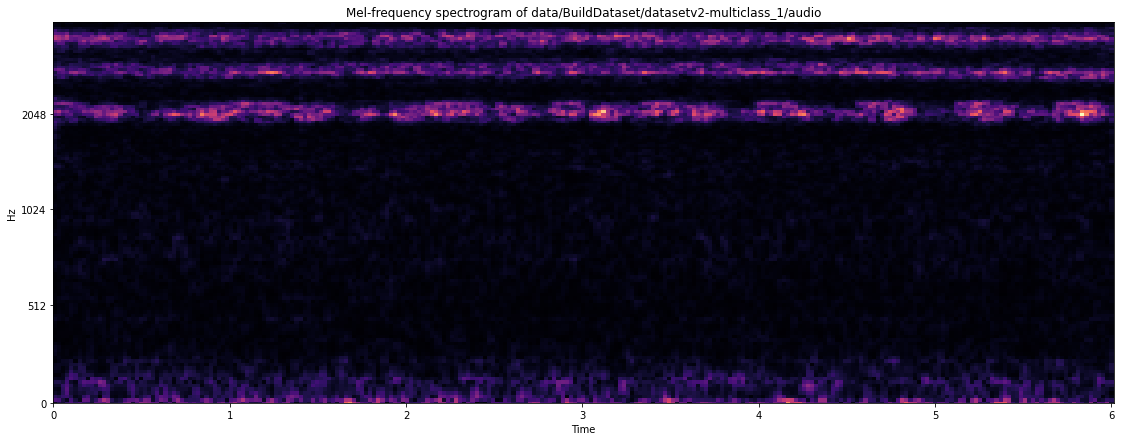

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
10165,SAMPLE_10165_INCT41_ABSENCE_FOLD_5.wav,INCT41_20200131_000000,27,30,ABSENCE,ABSENCE,NaN,INCT41,2020-01-31 00:00:00,INCT41_ABSENCE,...,0,0,0,0,0,0,0,0,0,0


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


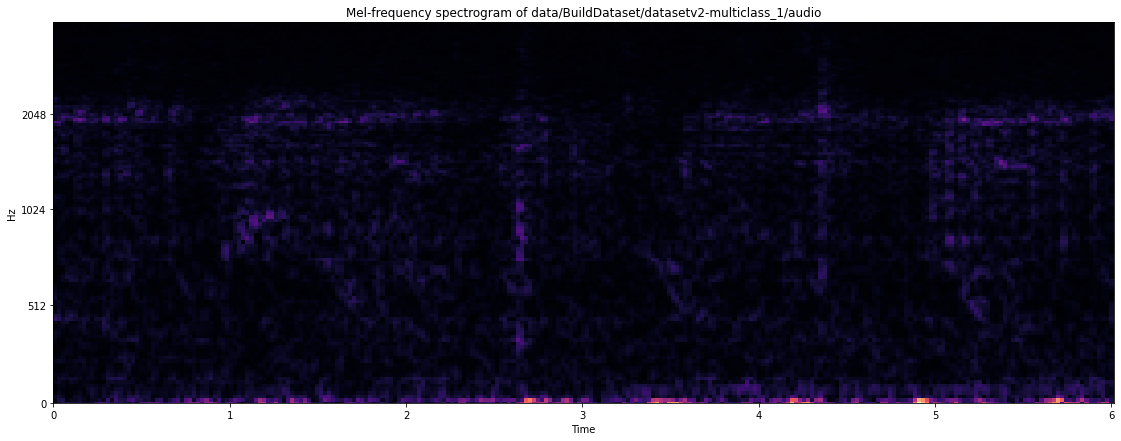

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
9296,SAMPLE_09296_INCT41_PHYCUV_F_FOLD_3.wav,INCT41_20210103_191500,21,24,PHYCUV_F,PHYCUV,F,INCT41,2021-01-03 19:15:00,INCT41_PHYCUV_F,...,0,0,0,0,1,0,0,0,0,0


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


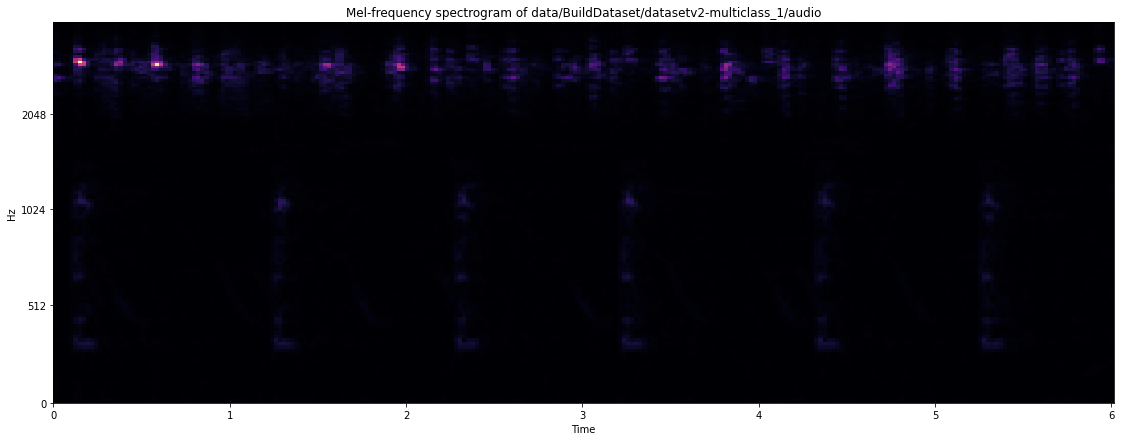

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
243,SAMPLE_00243_INCT20955_BOAFAB_M_FOLD_2.wav,INCT20955_20191012_203000,27,30,BOAFAB_M,BOAFAB,M,INCT20955,2019-10-12 20:30:00,INCT20955_BOAFAB_M,...,0,0,0,0,0,0,0,0,0,0


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


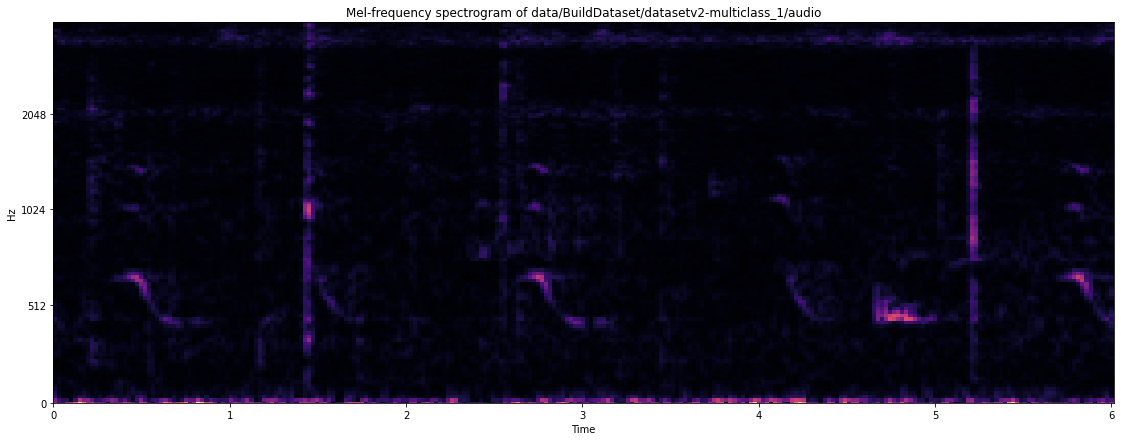

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
7221,SAMPLE_07221_INCT41_PHYCUV_F_FOLD_4.wav,INCT41_20201031_210000,10,13,PHYCUV_F,PHYCUV,F,INCT41,2020-10-31 21:00:00,INCT41_PHYCUV_F,...,0,0,0,0,1,0,0,0,0,0


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


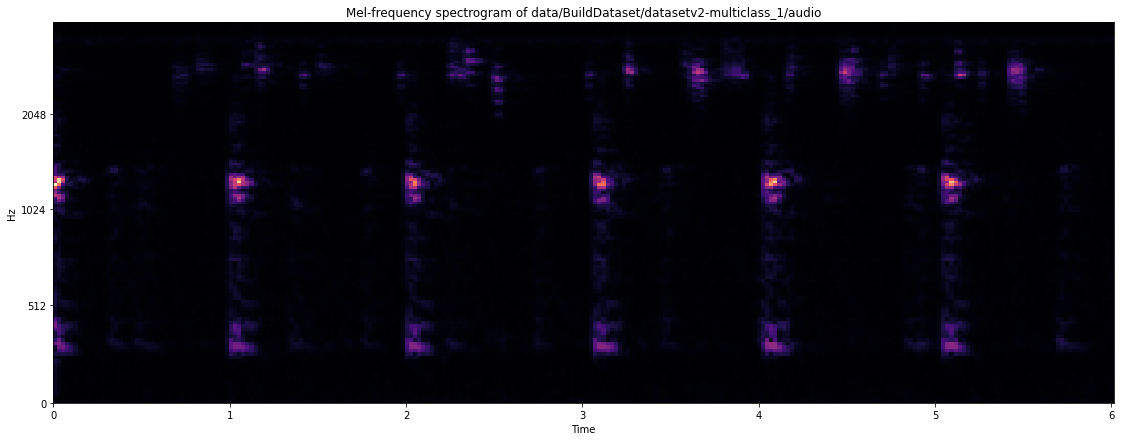

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
2558,SAMPLE_02558_INCT20955_BOAFAB_M_FOLD_4.wav,INCT20955_20200213_203000,51,54,BOAFAB_M,BOAFAB,M,INCT20955,2020-02-13 20:30:00,INCT20955_BOAFAB_M,...,0,0,0,0,0,0,0,0,0,0


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


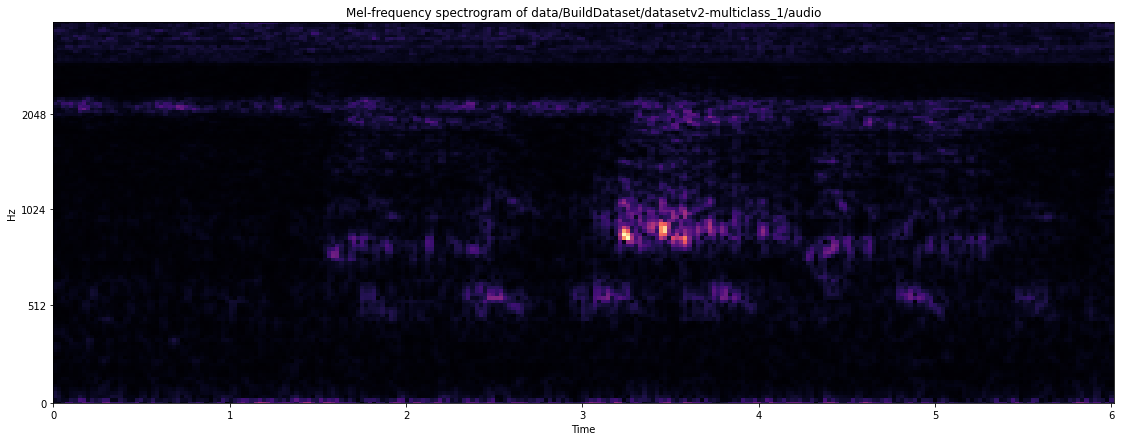

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
7010,SAMPLE_07010_INCT41_BOALUN_F_FOLD_0.wav,INCT41_20201028_224500,38,41,BOALUN_F,BOALUN,F,INCT41,2020-10-28 22:45:00,INCT41_BOALUN_F,...,1,0,0,0,0,0,0,0,0,0


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


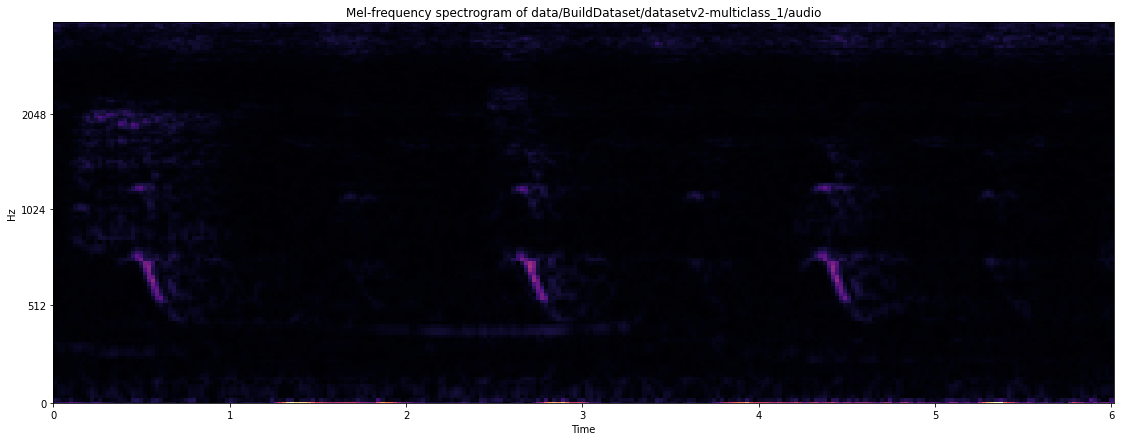

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
9103,SAMPLE_09103_INCT41_PHYCUV_M_FOLD_1.wav,INCT41_20201231_190000,35,38,PHYCUV_M,PHYCUV,M,INCT41,2020-12-31 19:00:00,INCT41_PHYCUV_M,...,0,0,0,0,0,1,0,0,0,0


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


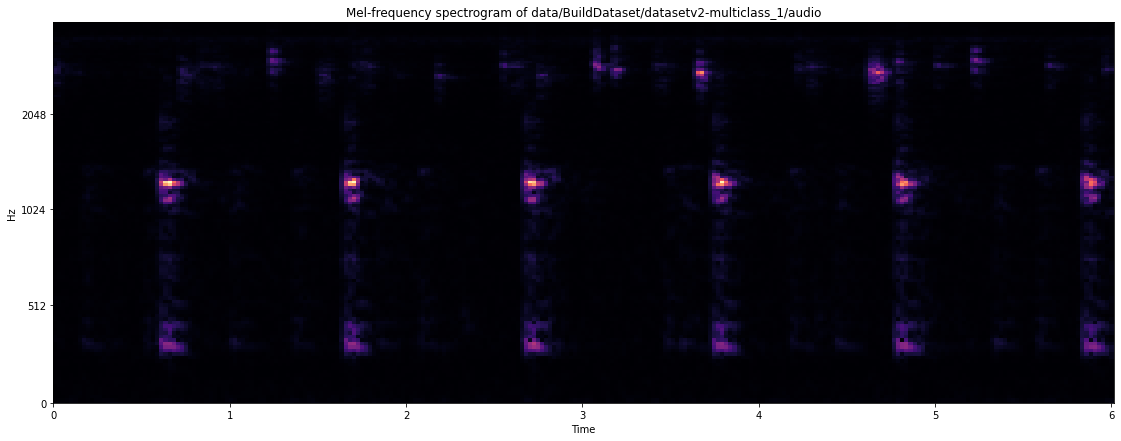

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
2534,SAMPLE_02534_INCT20955_PHYCUV_F_FOLD_4.wav,INCT20955_20200213_203000,39,42,PHYCUV_F,PHYCUV,F,INCT20955,2020-02-13 20:30:00,INCT20955_PHYCUV_F,...,0,0,0,0,0,0,0,0,0,0


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


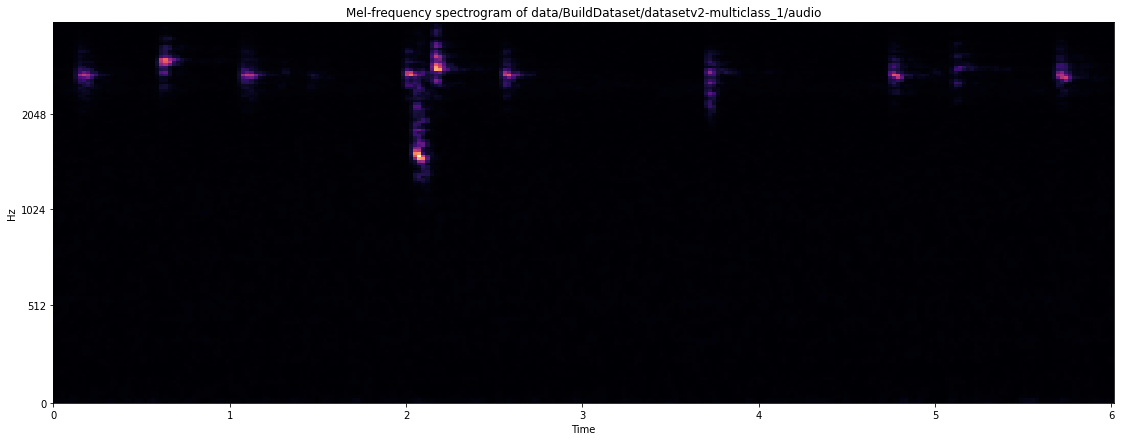

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
4757,SAMPLE_04757_INCT20955_ABSENCE_FOLD_5.wav,INCT20955_20200326_200000,39,42,ABSENCE,ABSENCE,NaN,INCT20955,2020-03-26 20:00:00,INCT20955_ABSENCE,...,0,0,0,0,0,0,0,0,0,0


/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/anaconda/envs/trans_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


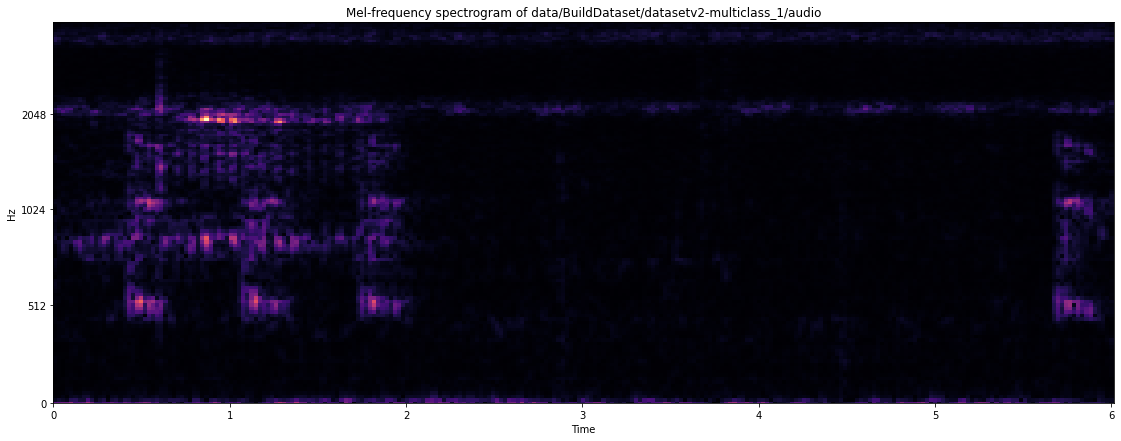

,sample_name,fname,min_t,max_t,label,species,quality,site,date,class,...,INCT41_BOALUN_F,INCT41_BOALUN_M,INCT41_DENCRU_F,INCT41_DENCRU_M,INCT41_PHYCUV_F,INCT41_PHYCUV_M,INCT41_PHYMAR_F,INCT41_PHYMAR_M,INCT41_PITAZU_F,INCT41_PITAZU_M
7369,SAMPLE_07369_INCT41_BOALUN_F_FOLD_2.wav,INCT41_20201105_211500,5,8,BOALUN_F,BOALUN,F,INCT41,2020-11-05 21:15:00,INCT41_BOALUN_F,...,1,0,0,0,0,0,0,0,0,0


In [10]:
# INCT41_20201211_211500
# INCT41_20201015_183000
for i in range(10):
    file_name = plot_listen_examples(recordings_folder)
    if '.wav' in file_name:
        display(df[df['sample_name']==file_name])

In [44]:
!ls

README.md     basic_eda.ipynb	    data		 preprocessing
__pycache__   classifiers	    experiments		 utils.py
augmentation  create_dataset.ipynb  features_extractors


In [63]:
path = 'data/BuildDataset/datasetv1/binary_phycuv_1/df_train_test_files.csv'
df_annotations = pd.read_csv(path)

In [65]:
df_annotations_f = df_annotations[["sample_name", "fname",'ABSENCE','PHYCUV_M']]
df_annotations_f = df_annotations_f.melt(id_vars=["sample_name", "fname"], var_name='label')
df_annotations_f = df_annotations_f[df_annotations_f['value']==1]
df_annotations_f = df_annotations_f[['sample_name','label']]
df_annotations = pd.merge(df_annotations, df_annotations_f, on='sample_name' , how='left')

In [66]:
df_annotations['label'].value_counts()

ABSENCE     170
PHYCUV_M    170
Name: label, dtype: int64

In [67]:
df_annotations.head()

,sample_name,fname,min_t,max_t,ABSENCE,PHYCUV_M,site,date,dataset,label
0,SAMPLE_000.wav,INCT20955_20191011_214500,29.0,32.0,0.0,1.0,INCT20955,2019-10-11 21:45:00,train,PHYCUV_M
1,SAMPLE_001.wav,INCT20955_20191011_214500,31.0,34.0,0.0,1.0,INCT20955,2019-10-11 21:45:00,test,PHYCUV_M
2,SAMPLE_002.wav,INCT20955_20191011_214500,34.0,37.0,0.0,1.0,INCT20955,2019-10-11 21:45:00,test,PHYCUV_M
3,SAMPLE_003.wav,INCT20955_20191011_214500,37.0,40.0,0.0,1.0,INCT20955,2019-10-11 21:45:00,train,PHYCUV_M
4,SAMPLE_004.wav,INCT20955_20191011_214500,39.0,42.0,0.0,1.0,INCT20955,2019-10-11 21:45:00,train,PHYCUV_M
